Titanic Survival Classifier

In [ ]:
Task 2 @ BharatIntern Data Science Internship

Task Overview: 
Build a predictive model to determine the likelihood of survival for passengers on
the Titanic using data science techniques in Python.    

Dataset Link: https://www.kaggle.com/datasets/yasserh/titanic-dataset

In [1]:
#IMPORTING THE NECESSARY LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#READING THE DATA
data = pd.read_csv('Titanic-Dataset.csv', index_col='PassengerId')
data.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

The data is first cleaned by removing the columns that are not needed for the classifier. The columns that are removed are:

PassengerId
Name
Ticket

In [3]:
data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

The rows with missing and duplicate values are then dropped from the dataset.

In [4]:
data.dropna(axis=0, inplace=True)
data.drop_duplicates(inplace=True)

EXPLORATORY DATA ANALYSIS

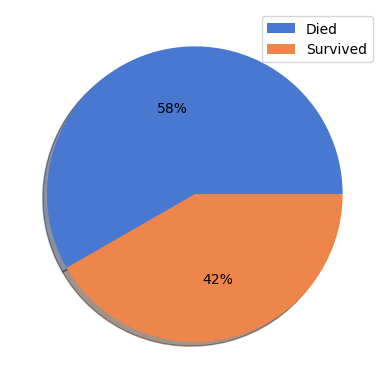

In [5]:
import seaborn as sns

counts = data.Survived.value_counts().values 
explode = (0, 0)

plt.pie(counts, explode=explode, labels=None, shadow=True, colors=sns.color_palette('muted'), autopct='%.0f%%', radius=1)
plt.legend(["Died", 'Survived'])

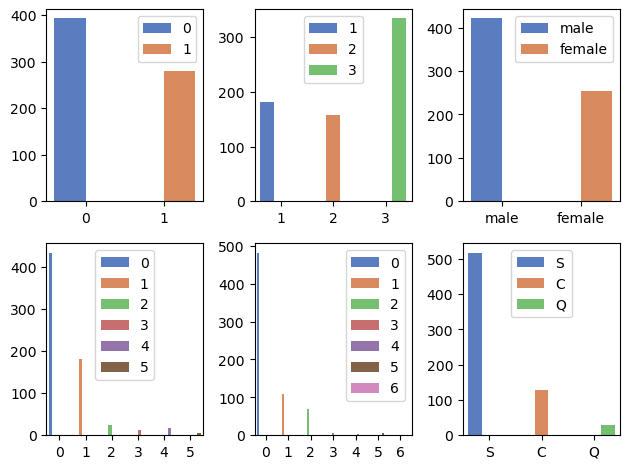

In [6]:
i = 1
sns.set_palette(sns.color_palette('muted'))
for column in ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]:
    plt.subplot(2, 3, i)
    sns.barplot(x=data[column].value_counts().index,
                y=data[column].value_counts().values, hue=data[column].value_counts().index)
    i += 1
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

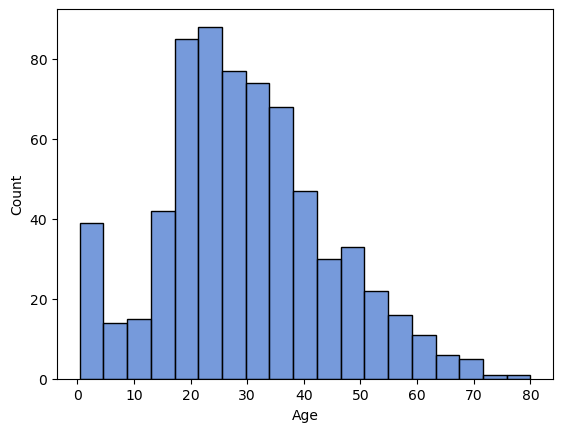

In [7]:
sns.histplot(data['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

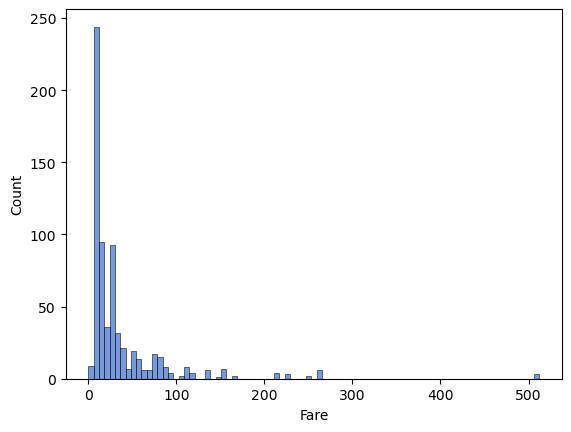

In [8]:
sns.histplot(data['Fare'])

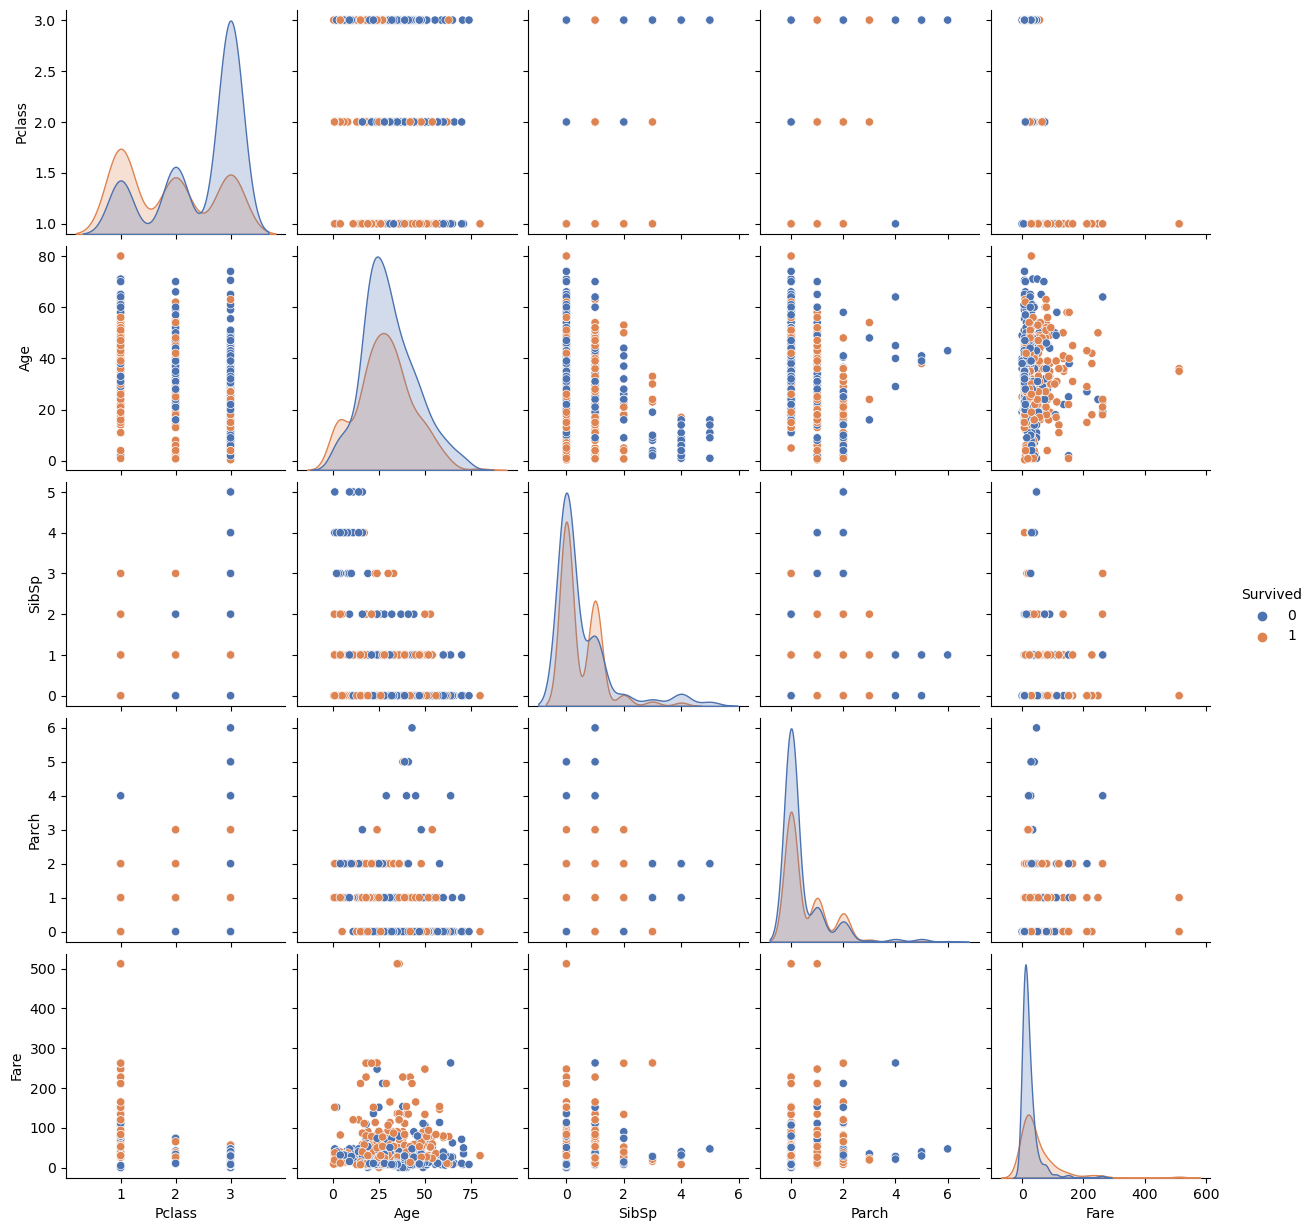

In [9]:
sns.set_palette(sns.color_palette('deep'))
sns.pairplot(data, hue='Survived')

DATA PRE PROCESSING

The attributes with non numerical data are encoded to numerical data manually.

In [10]:
data.Sex.replace(to_replace=['male', 'female'], value=[1, 0], inplace=True)
data.Embarked.replace(to_replace=['S', 'C', 'Q'], value=[
                      0, 1, 2], inplace=True)

The rows with outliers are then dropped from the dataset.

In [11]:
for i in [i for i in data.columns]:
    if data[i].nunique() >= 12:
        Q1 = data[i].quantile(0.20)
        Q3 = data[i].quantile(0.80)
        IQR = Q3 - Q1
        data = data[data[i] <= (Q3+(1.5*IQR))]
        data = data[data[i] >= (Q1-(1.5*IQR))]
data = data.reset_index(drop=True)

SMOTE technique is used to balance the dataset to get equal number of the target variables.

In [12]:
from imblearn.over_sampling import SMOTE
x_cols = ['Pclass', 'Sex', 'Fare', 'Embarked']
y_col = 'Survived'

x = data[x_cols]
y = data[y_col]


smote = SMOTE()
X, Y = smote.fit_resample(x, y)
data = pd.DataFrame(X, columns=x_cols)
data[y_col] = Y

In [14]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 5.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


We then split the data into training and testing datasets in the ratio 80:20.

In [13]:
from sklearn.model_selection import train_test_split

x = data[x_cols]
y = data[y_col]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

The data is standardized using StandardScaler.

In [14]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

x_train_std = std.fit_transform(x_train)
x_train_std = pd.DataFrame(x_train_std, columns=x_cols)

x_test_std = std.fit_transform(x_test)
x_test_std = pd.DataFrame(x_test_std, columns=x_cols)

Model Building and Testing

DecisionTree classifier is used to fit and predict the data.

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(x_train_std, y_train)
y_pred = clf.predict(x_test_std)

The confusion matrix and classification report are used to evaluate the model.

              precision    recall  f1-score   support

           0       0.72      0.83      0.77        75
           1       0.81      0.70      0.75        79

    accuracy                           0.76       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.77      0.76      0.76       154



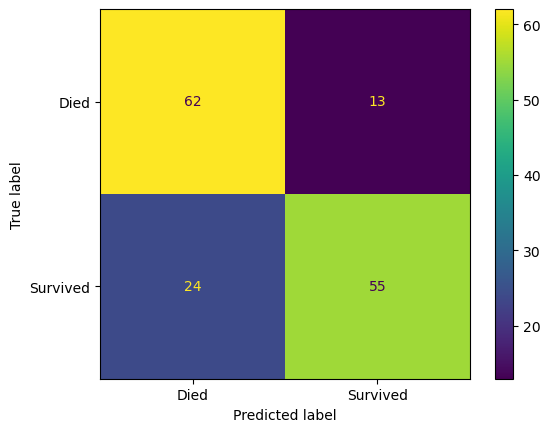

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Died', 'Survived']).plot()

In [ ]:
VISUALISING THE DECISION TREE MODEL

In [21]:
pip install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 5.6 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=eab35a634cad166e38e924c6d30a0b640dbad2b6f9cf3b51d5c2e7016c946554
  Stored in directory: /Users/varun/Library/Caches/pip/wheels/89/e5/de/6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install GraphViz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
import os
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

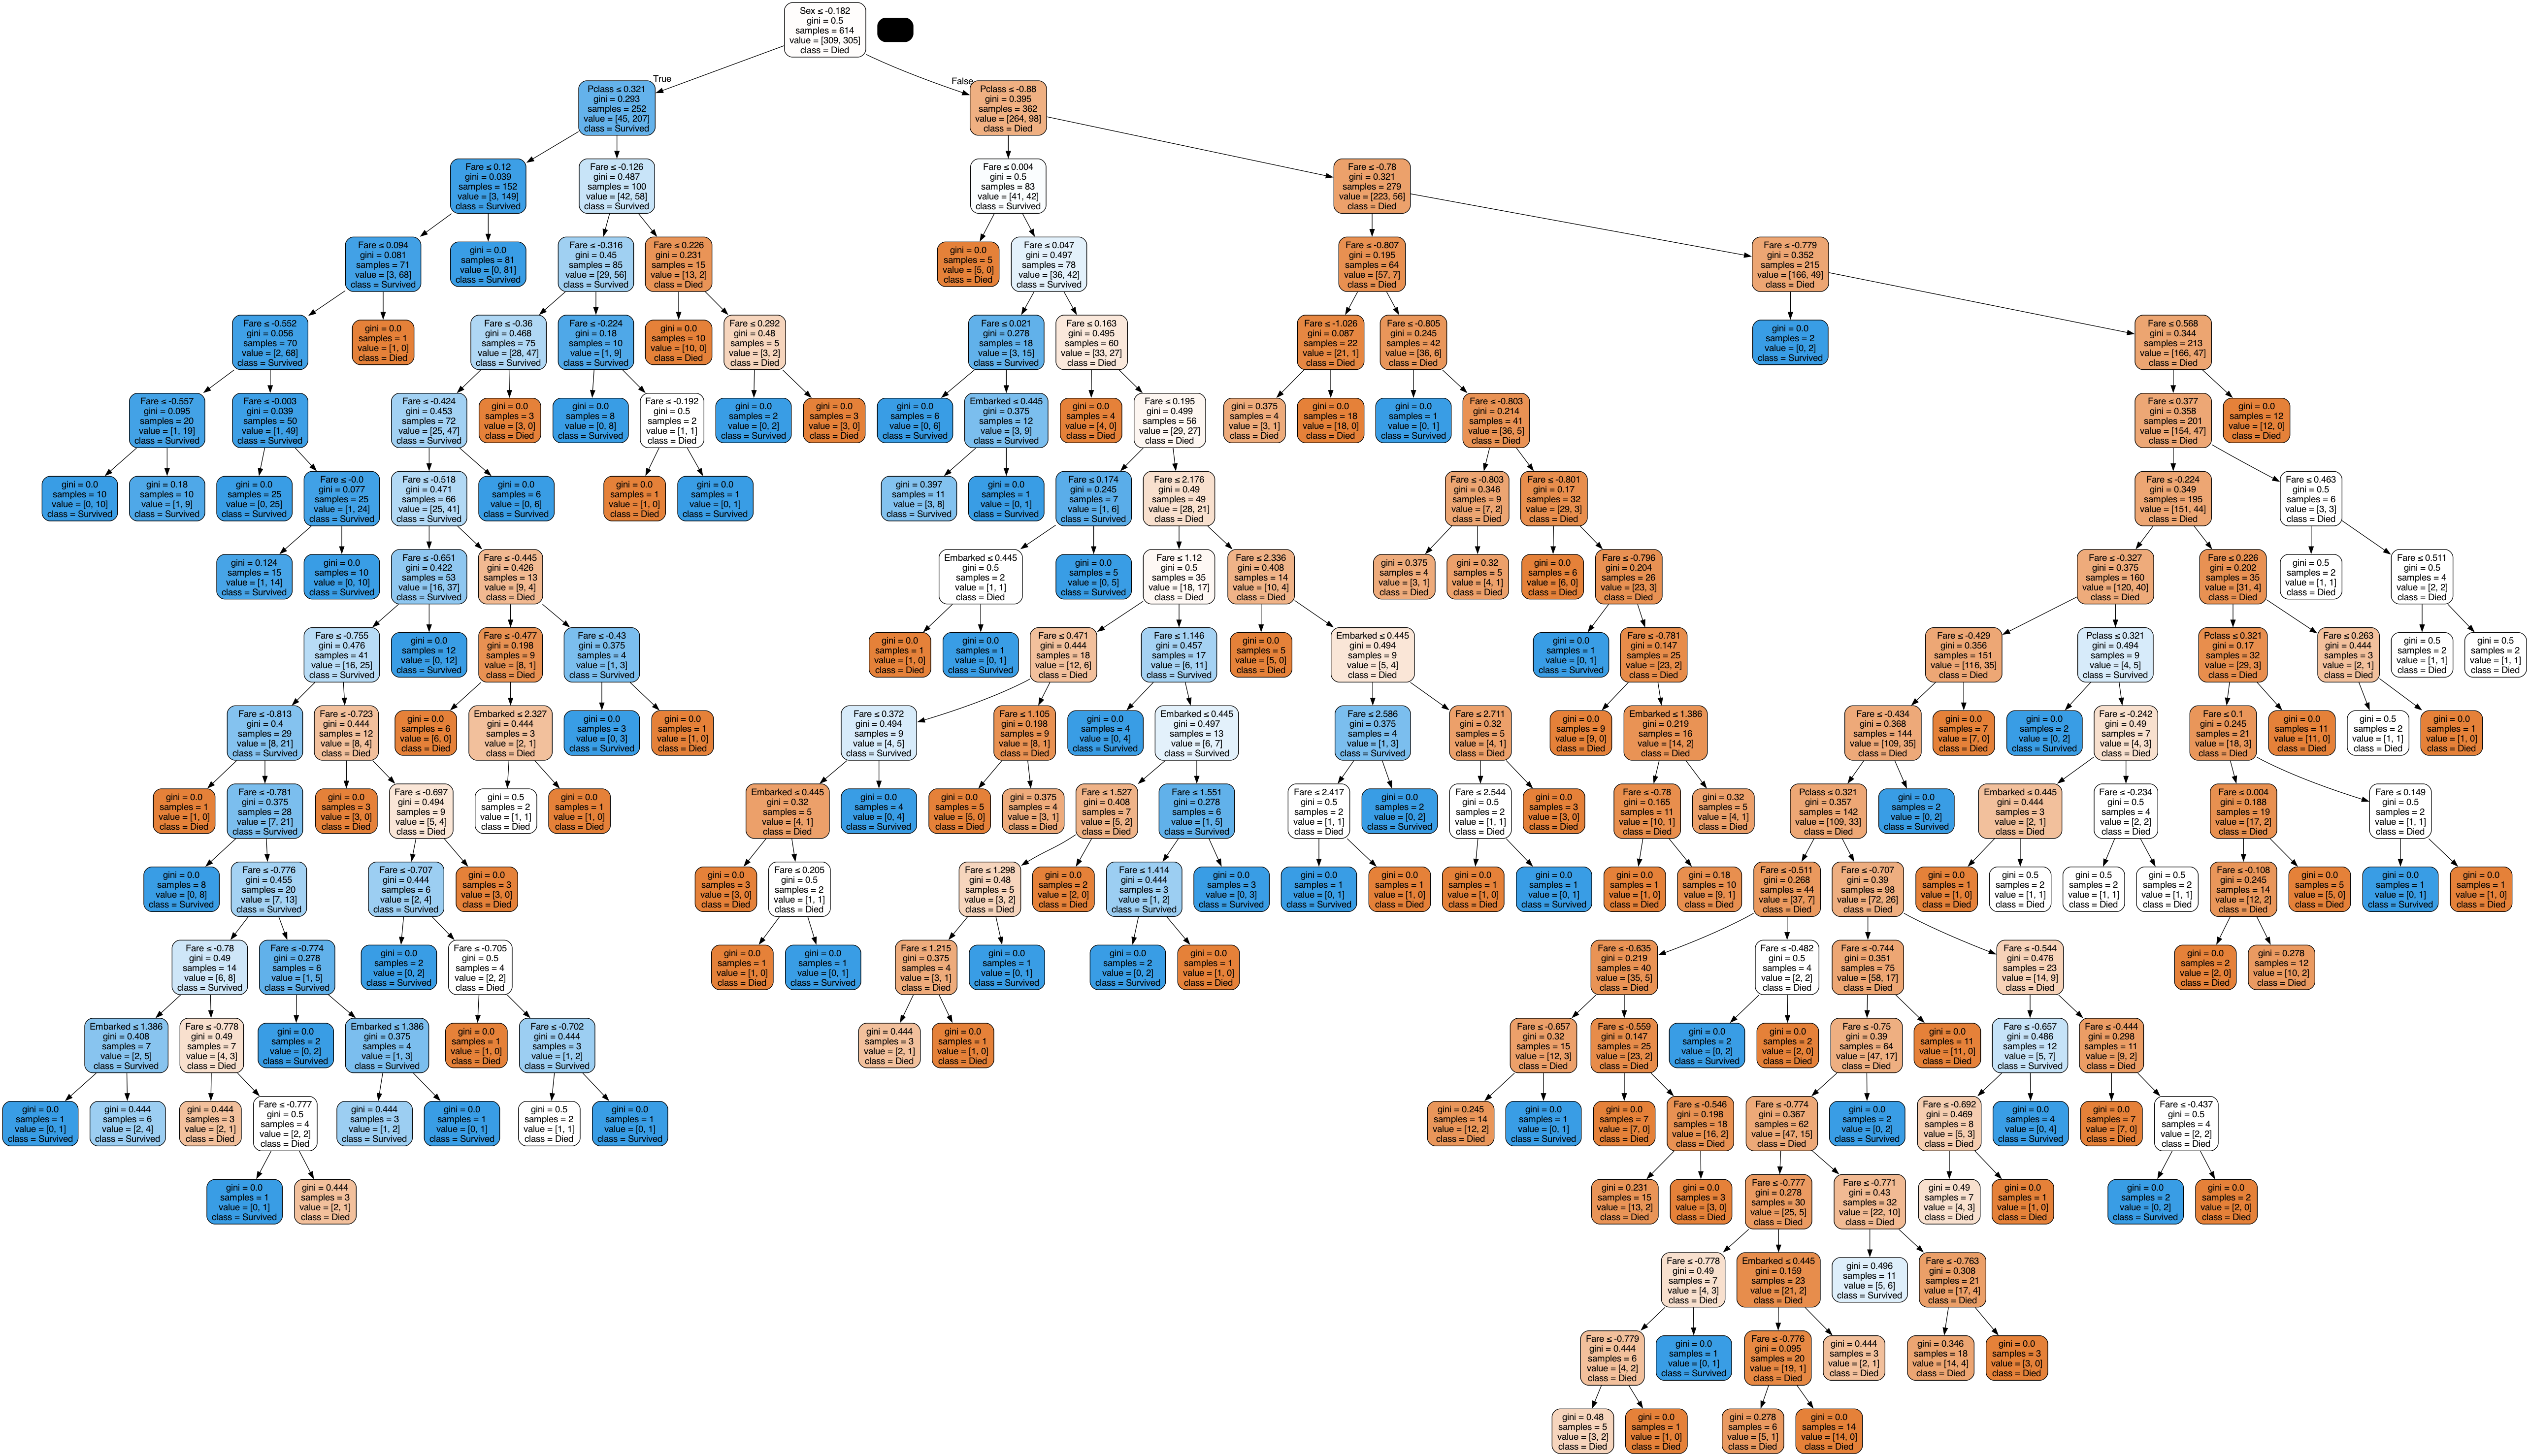

In [23]:
import os
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

os.environ["PATH"] += os.pathsep + '/path/to/dot'  # Replace '/path/to/dot' with the actual path from step 2

dot_data = export_graphviz(clf, out_file=None, filled=True, rounded=True,
                           special_characters=True, feature_names=x_cols, class_names=['Died', 'Survived'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Thank You!